Objectif : prévoir le succès d'une application Android en créant un modèle ML capable de prédire la popularité d'une application en fonction de certains facteurs.

# Chargement et consultation des données

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Train.csv to Train.csv
User uploaded file "Train.csv" with length 1589864 bytes


In [6]:
import pandas as pd
df= pd.read_csv("Train.csv")
print(df.head(10))

    Offered_By             Category  ...  OS_Version_Required    Downloads
0  ps_id-24654              Finance  ...   Varies with device     100,000+
1  ps_id-35329      Music And Audio  ...           4.1 and up       5,000+
2  ps_id-11044          Game Casual  ...           4.1 and up      10,000+
3  ps_id-36068             Business  ...   Varies with device  10,000,000+
4  ps_id-35831              Medical  ...   Varies with device       5,000+
5  ps_id-17918  Books And Reference  ...           4.1 and up      10,000+
6  ps_id-11727              Finance  ...           5.0 and up      50,000+
7   ps_id-4496                Tools  ...           4.4 and up   1,000,000+
8   ps_id-9590              Finance  ...           4.0 and up      10,000+
9   ps_id-7167                 Game  ...           4.0 and up  10,000,000+

[10 rows x 11 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Offered_By           16516 non-null  object 
 1   Category             16516 non-null  object 
 2   Rating               16516 non-null  float64
 3   Reviews              16516 non-null  int64  
 4   Size                 16516 non-null  object 
 5   Price                16516 non-null  object 
 6   Content_Rating       16516 non-null  object 
 7   Last_Updated_On      16516 non-null  object 
 8   Release_Version      16516 non-null  object 
 9   OS_Version_Required  16516 non-null  object 
 10  Downloads            16516 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
Downloads              0
dtype: int64

In [9]:
df.describe()

,Rating,Reviews
count,16516.000000,1.651600e+04
mean,4.259646,1.931973e+05
std,0.498968,1.953846e+06
min,1.000000,1.000000e+00
25%,4.090000,1.470000e+02
50%,4.360000,1.890000e+03
75%,4.580000,2.266925e+04
max,5.000000,8.576643e+07


# Création et entrainement d'un modèle de ML

In [10]:
# install pycaret
!pip install pycaret

     |████████████████████████████████| 71kB 2.5MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [11]:
from pycaret.regression import *
PTA= setup(df, target= "Downloads")

 
Setup Succesfully Completed.


,Description,Value
0,session_id,646
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(16516, 11)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

IntProgress(value=0, description='Processing: ', max=251)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:54:35
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 10
Estimator,. . . . . . . . . . . . . . . . . .,Ridge Regression
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Lasso Regression,3.9137,2.352220e+01,4.8495,-1.300000e-03,0.8650,1.3087,2.6272
1,Linear Regression,1410.3515,1.198384e+08,8317.8738,-5.136531e+06,4.3363,401.7674,139.5275


In [12]:
LR = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.8901,23.7824,4.8767,-0.0126,0.8294,1.1481
1,3.9598,23.9823,4.8972,0.0019,0.8715,1.3701
2,3.8707,23.4814,4.8458,-0.0024,0.8465,1.1815
3,3.9686,23.8480,4.8834,-0.0015,0.8954,1.3732
4,3.8254,22.5619,4.7499,0.0053,0.8476,1.3043
5,3.9060,23.1643,4.8129,0.0004,0.8622,1.3412
6,3.9859,24.4584,4.9455,0.0030,0.8630,1.3641
7,3.9146,23.6527,4.8634,0.0044,0.8635,1.2941
8,3.8970,23.1511,4.8116,-0.0011,0.8913,1.3345
9,3.9420,23.8854,4.8873,-0.0028,0.8649,1.3305


# Visualisation des données

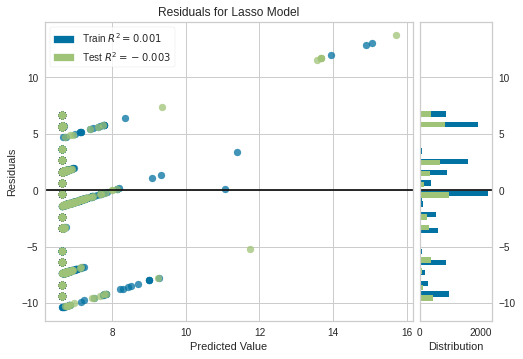

In [13]:
plot_model(LR)

In [20]:
!pip install shap

     |████████████████████████████████| 327kB 3.2MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456460 sha256=7693ca3bcae311ed5fd612203adae13057293d90c3eac0cd2a6a7cbfea6d7542
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [24]:
predict_model(LR)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso,3.9626,24.0426,4.9033,-0.0028,0.8663,1.3043


,Rating,Reviews,Offered_By_ps_id-1,Offered_By_ps_id-1000,Offered_By_ps_id-10002,Offered_By_ps_id-10005,Offered_By_ps_id-10006,Offered_By_ps_id-10008,Offered_By_ps_id-10009,Offered_By_ps_id-10014,Offered_By_ps_id-10017,Offered_By_ps_id-10018,Offered_By_ps_id-10022,Offered_By_ps_id-10025,Offered_By_ps_id-10026,Offered_By_ps_id-10027,Offered_By_ps_id-10029,Offered_By_ps_id-1003,Offered_By_ps_id-10031,Offered_By_ps_id-10032,Offered_By_ps_id-10037,Offered_By_ps_id-10038,Offered_By_ps_id-10039,Offered_By_ps_id-10040,Offered_By_ps_id-10041,Offered_By_ps_id-10042,Offered_By_ps_id-10043,Offered_By_ps_id-10044,Offered_By_ps_id-10045,Offered_By_ps_id-10046,Offered_By_ps_id-10048,Offered_By_ps_id-10050,Offered_By_ps_id-10051,Offered_By_ps_id-10052,Offered_By_ps_id-10053,Offered_By_ps_id-10054,Offered_By_ps_id-10055,Offered_By_ps_id-10057,Offered_By_ps_id-10058,Offered_By_ps_id-10062,...,OS_Version_Required_3.2 and up,OS_Version_Required_4.0 and up,OS_Version_Required_4.0.3 and up,OS_Version_Required_4.1 and up,OS_Version_Required_4.2 and up,OS_Version_Required_4.3 and up,OS_Version_Required_4.4 and up,OS_Version_Required_4.4w and up,OS_Version_Required_5.0 and up,OS_Version_Required_5.1 and up,OS_Version_Required_6.0 and up,OS_Version_Required_7.0 and up,OS_Version_Required_7.1 and up,OS_Version_Required_8.0 and up,OS_Version_Required_Varies with device,Last_Updated_On_month_1,Last_Updated_On_month_10,Last_Updated_On_month_11,Last_Updated_On_month_12,Last_Updated_On_month_2,Last_Updated_On_month_3,Last_Updated_On_month_4,Last_Updated_On_month_5,Last_Updated_On_month_6,Last_Updated_On_month_7,Last_Updated_On_month_8,Last_Updated_On_month_9,Last_Updated_On_weekday_0,Last_Updated_On_weekday_1,Last_Updated_On_weekday_2,Last_Updated_On_weekday_3,Last_Updated_On_weekday_4,Last_Updated_On_weekday_5,Last_Updated_On_weekday_6,Last_Updated_On_is_month_end_0,Last_Updated_On_is_month_end_1,Last_Updated_On_is_month_start_0,Last_Updated_On_is_month_start_1,Downloads,Label
0,3.90,249.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4,6.6330
1,4.32,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4,6.6329
2,4.59,299.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13,6.6330
3,4.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,6,6.6329
4,3.21,965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7,6.6330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,4.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [26]:
final_lr= finalize_model(LR)
print(final_lr)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=646,
      selection='cyclic', tol=0.0001, warm_start=False)


In [27]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Test.csv to Test.csv
User uploaded file "Test.csv" with length 2114106 bytes


In [33]:
test= pd.read_csv("Test.csv")
test.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-18231,Game Puzzle,4.52,1362,36M,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up
1,ps_id-1874,Shopping,4.29,3353,Varies with device,Free,Teen,May 05 2020,Varies with device,Varies with device
2,ps_id-3182,Photography,4.55,161855,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device
3,ps_id-31452,Game Action,3.97,545,16M,Free,Everyone,Dec 07 2016,2,4.1 and up
4,ps_id-25641,Photography,4.65,1672,33M,Free,Everyone,Jan 25 2020,1,4.4 and up


In [31]:
test_pred= predict_model(final_lr, data= test)
test_pred.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Label
index,,,,,,,,,,,
0,ps_id-18231,Game Puzzle,4.52,1362,36M,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up,6.6631
1,ps_id-1874,Shopping,4.29,3353,Varies with device,Free,Teen,May 05 2020,Varies with device,Varies with device,6.6632
2,ps_id-3182,Photography,4.55,161855,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,6.6721
3,ps_id-31452,Game Action,3.97,545,16M,Free,Everyone,Dec 07 2016,2,4.1 and up,6.6630
4,ps_id-25641,Photography,4.65,1672,33M,Free,Everyone,Jan 25 2020,1,4.4 and up,6.6631


In [36]:
sub= pd.read_csv("Sample_Submission.csv")
sub["Label"]= round(test_pred["Label"])
sub.to_csv("submission_app_playstore.csv", index= False)
sub.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Label
0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,7.0
1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,7.0
2,0.0,0.1,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.1,0.0,7.0
